In [1]:
# Name: Dhruv Kumar
# Roll No.: 24419CMP011
# Course: M.Sc. Computer Science
# Semester: 2nd

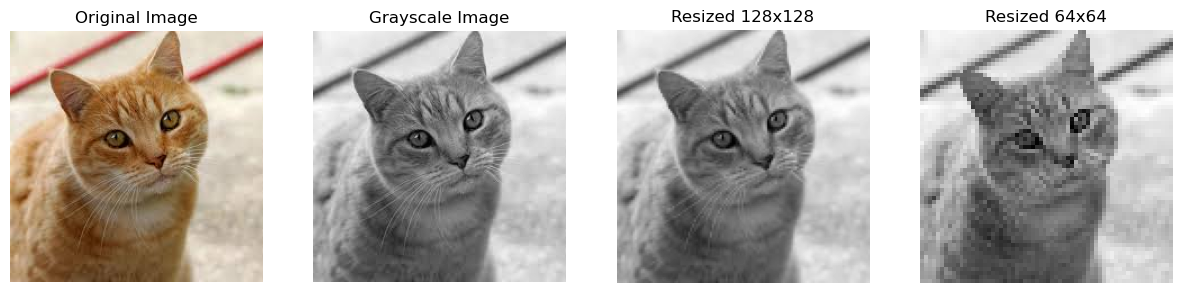

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load the color image
image = cv2.imread('D:\\Code\\cat.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale correctly
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Resize the grayscale image
resized_128 = cv2.resize(gray_image, (128, 128))
resized_64 = cv2.resize(gray_image, (64, 64))

# Display images using subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(image_rgb)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(gray_image, cmap='gray')
axes[1].set_title("Grayscale Image")
axes[1].axis('off')

axes[2].imshow(resized_128, cmap='gray')
axes[2].set_title("Resized 128x128")
axes[2].axis('off')

axes[3].imshow(resized_64, cmap='gray')
axes[3].set_title("Resized 64x64")
axes[3].axis('off')

plt.show()

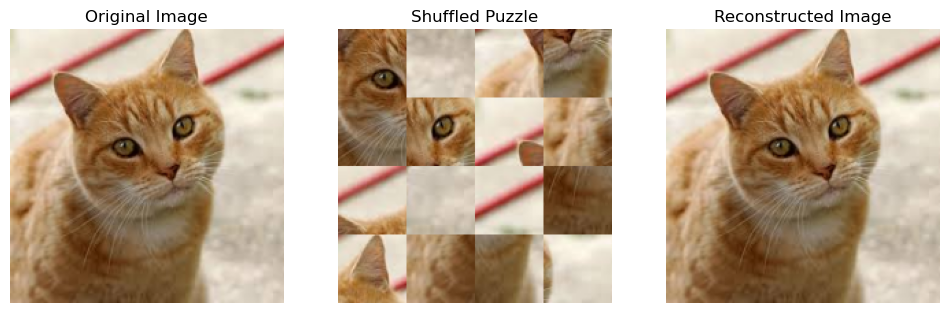

In [2]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

def divide_image(image, block_size):
    """Divides the image into blocks of given size."""
    h, w, _ = image.shape
    blocks = []
    indices = []
    
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = image[i:i+block_size, j:j+block_size]
            blocks.append(block)
            indices.append((i, j))
    
    return blocks, indices

def reconstruct_image(blocks, indices, image_shape, block_size):
    """Reconstructs the image from given blocks and indices."""
    h, w, c = image_shape
    reconstructed = np.zeros((h, w, c), dtype=np.uint8)
    
    for idx in range(len(blocks)):
        i, j = indices[idx]
        reconstructed[i:i+block_size, j:j+block_size] = blocks[idx]
    
    return reconstructed

def img_puzzle(image_path, block_size=50):
    """Creates an image puzzle by shuffling blocks and reconstructing the image."""
    
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape
    
    h = (h // block_size) * block_size
    w = (w // block_size) * block_size
    image = cv2.resize(image, (w, h))
    
    # Divide the image into blocks
    blocks, indices = divide_image(image, block_size)
    
    # Shuffle the blocks
    shuffled_indices = indices.copy()
    random.shuffle(shuffled_indices)
    
    shuffled_blocks = []
    for idx in shuffled_indices:
        original_position = indices.index(idx)
        shuffled_blocks.append(blocks[original_position])
    
    # Reconstruct shuffled image
    shuffled_image = reconstruct_image(shuffled_blocks, indices, image.shape, block_size)
    
    # Restore original order
    sorted_blocks = []
    for idx in indices:
        shuffled_position = shuffled_indices.index(idx)
        sorted_blocks.append(shuffled_blocks[shuffled_position])
    
    reconstructed_image = reconstruct_image(sorted_blocks, indices, image.shape, block_size)
    
    # Display images
    fig, axs = plt.subplots(1, 3, figsize=(12, 5))
    axs[0].imshow(image)
    axs[0].set_title("Original Image")
    axs[1].imshow(shuffled_image)
    axs[1].set_title("Shuffled Puzzle")
    axs[2].imshow(reconstructed_image)
    axs[2].set_title("Reconstructed Image")
    
    for ax in axs:
        ax.axis("off")
    plt.show()
    
    # Save the images
    cv2.imwrite("shuffled_puzzle.jpg", cv2.cvtColor(shuffled_image, cv2.COLOR_RGB2BGR))
    cv2.imwrite("reconstructed_image.jpg", cv2.cvtColor(reconstructed_image, cv2.COLOR_RGB2BGR))

img_puzzle("D:\\Code\\cat.jpeg", 50)